In [1]:
auth_token = "..."

In [2]:
import requests
import pandas as pd

def get_search(offset, auth_token):
    headers = {"authorization": auth_token}
    url = (
        "https://discord.com/api/v9/guilds/349436576037732353"
        "/messages/search"
        "?author_id=730758759743225908"
        "&include_nsfw=true"
        f"&offset={offset}"
    )
    return requests.get(url, headers=headers)

res = get_search(0, auth_token).json()

In [4]:
from tqdm import tqdm
import itertools
import time

messages = []
for i in tqdm(range(40)):
    offset = i * 25
    search = get_search(offset, auth_token)
    messages += list(itertools.chain.from_iterable(search.json()['messages']))
    time.sleep(0.5)
print(len(messages))

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:41<00:00,  1.03s/it]

995


In [5]:
df = pd.DataFrame(messages)
ts_df = df[["timestamp"]].copy()
ts_df["timestamp"] = pd.to_datetime(ts_df["timestamp"])
ts_df["date"] = ts_df["timestamp"].dt.date
ts_df["hour"] = (ts_df["timestamp"].dt.hour + ts_df["timestamp"].dt.minute / 60).round(2)
ts_df.to_csv("2023-08-24-curche.csv", index=False)

In [6]:
ts_df

,timestamp,date,hour
0,2023-08-24 05:14:17.339000+00:00,2023-08-24,5.23
1,2023-08-24 05:13:16.670000+00:00,2023-08-24,5.22
2,2023-08-24 04:41:54.526000+00:00,2023-08-24,4.68
3,2023-08-24 02:54:06.333000+00:00,2023-08-24,2.90
4,2023-08-24 02:53:59.885000+00:00,2023-08-24,2.88
...,...,...,...
990,2023-08-18 01:52:33.036000+00:00,2023-08-18,1.87
991,2023-08-18 01:51:59.204000+00:00,2023-08-18,1.85
992,2023-08-18 01:51:35.348000+00:00,2023-08-18,1.85
993,2023-08-18 01:51:15.103000+00:00,2023-08-18,1.85


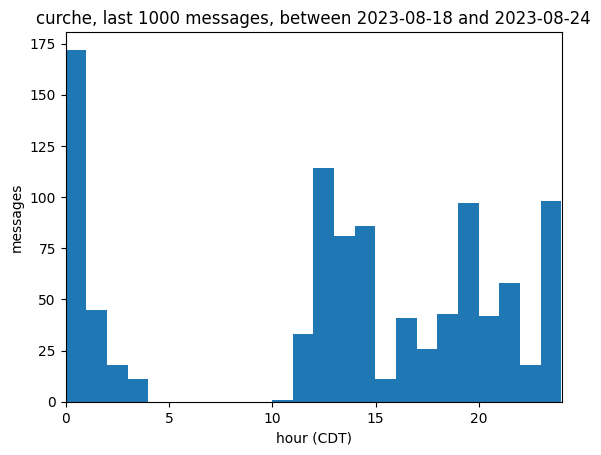

In [11]:
import matplotlib.pyplot as plt

plt.hist((ts_df.hour - 5) % 24, bins=24)
plt.title(f"curche, last 1000 messages, between {ts_df.date.min()} and {ts_df.date.max()}")
plt.xlim(0, 24)
plt.xlabel("hour (CDT)")
plt.ylabel("messages")
plt.show()